In [360]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [341]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [342]:
X = df[['Pclass','Sex','Age','Fare']]
y = df['Survived']

In [343]:
dummy = pd.get_dummies(X.Sex, dtype = 'int')
dummy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [344]:
X = pd.concat([X,dummy], axis = 1)

In [345]:
X.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [346]:
X = X.drop(['Sex'], axis = 1)

In [347]:
X.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [348]:
X.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [349]:
X['Age'] = X['Age'].fillna(X.Age.mean())

In [350]:
X.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

In [351]:
y.isna().sum()

0

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [353]:
model = GaussianNB()

In [354]:
model.fit(X_train, y_train)

GaussianNB()

In [355]:
score = model.score(X_test, y_test)
score

0.7574626865671642

In [356]:
cross_val_score(model, X, y, cv = 5).mean()

0.7845019145063085

In [358]:
y_pred = cross_val_predict(model, X, y, cv = 5)

In [359]:
cm = confusion_matrix(y, y_pred)
cm

array([[456,  93],
       [ 99, 243]], dtype=int64)

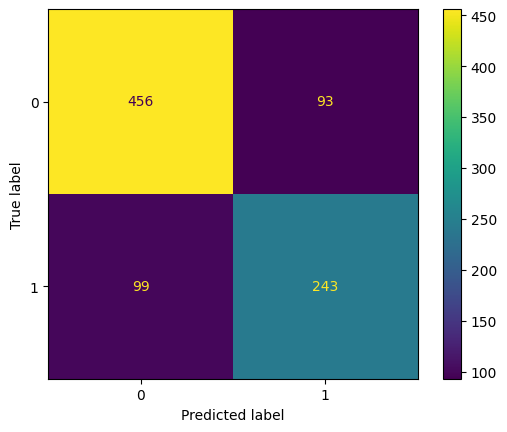

In [363]:
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_).plot()